In [1]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [2]:
import tensorflow as tf

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print the shapes of the training and test sets
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [3]:
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[SparseCategoricalAccuracy()])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4966 - sparse_categorical_accuracy: 0.4539 - val_loss: 1.3235 - val_sparse_categorical_accuracy: 0.5262
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1508 - sparse_categorical_accuracy: 0.5906 - val_loss: 1.1154 - val_sparse_categorical_accuracy: 0.5947
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9904 - sparse_categorical_accuracy: 0.6508 - val_loss: 1.0177 - val_sparse_categorical_accuracy: 0.6436
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8845 - sparse_categorical_accuracy: 0.6926 - val_loss: 0.9037 - val_sparse_categorical_accuracy: 0.6848
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8107 - sparse_categorical_accuracy: 0.7175 - val_loss: 0.9566 - val_sparse_categorical_accuracy: 0.6776
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.

In [4]:

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.8637 - sparse_categorical_accuracy: 0.7149 - 3s/epoch - 10ms/step

Test accuracy: 0.714900016784668


35363/35363 [==============================] - 0s 0us/step
1. Egyptian_cat: 28.16%
2. tiger_cat: 4.62%
3. lynx: 3.28%


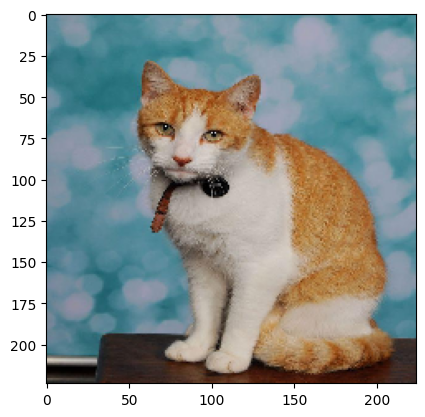

In [7]:

%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np


# Load the pre-trained MobileNetV2 model
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=True)

# Load and preprocess the image
img_path = '/content/cat01.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Print the top 3 predicted labels
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print("{}. {}: {:.2f}%".format(i+1, label, score * 100))


plt.imshow(img)
plt.show()

In [9]:
!pip install pandas
import pandas as pd

x_train = pd.read_csv('/content/train.csv')
x_train.head()

,Name,Extension,Date accessed,Date modified,Date created,Folder Path
0,cat_10.jpg,.jpg,05-04-2024 11:37,05-04-2024 11:37,20-12-2022 12:13,C:\sariga\train\cats\
1,cat_100.jpg,.jpg,05-04-2024 11:37,05-04-2024 11:37,20-12-2022 12:13,C:\sariga\train\cats\
2,cat_101.jpg,.jpg,05-04-2024 11:37,05-04-2024 11:37,20-12-2022 12:13,C:\sariga\train\cats\
3,cat_102.jpg,.jpg,05-04-2024 11:37,05-04-2024 11:37,20-12-2022 12:13,C:\sariga\train\cats\
4,cat_103.jpg,.jpg,05-04-2024 11:37,05-04-2024 11:37,20-12-2022 12:13,C:\sariga\train\cats\


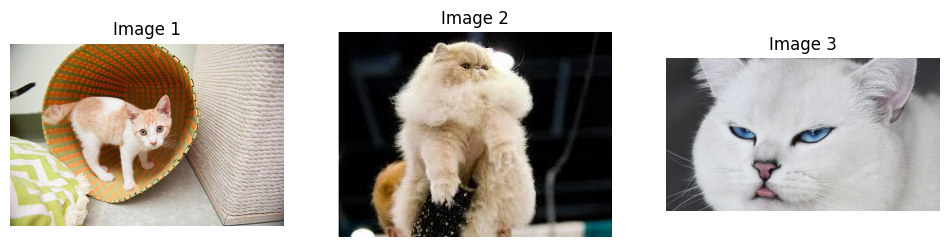

In [17]:
import cv2
import matplotlib.pyplot as plt

# Load images
image_paths = ['/content/cat_42.jpg', '/content/cat_52.jpg', '/content/cat_98.jpg']  # Replace with your image file paths
images = [cv2.imread(path) for path in image_paths]





# Plot images
num_images = len(images)
fig, axes = plt.subplots(1, num_images, figsize=(12, 4))  # Adjust figsize as needed

for i, (image, ax) in enumerate(zip(images, axes)):
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.show()

1/1 [==============================] - 0s 295ms/step


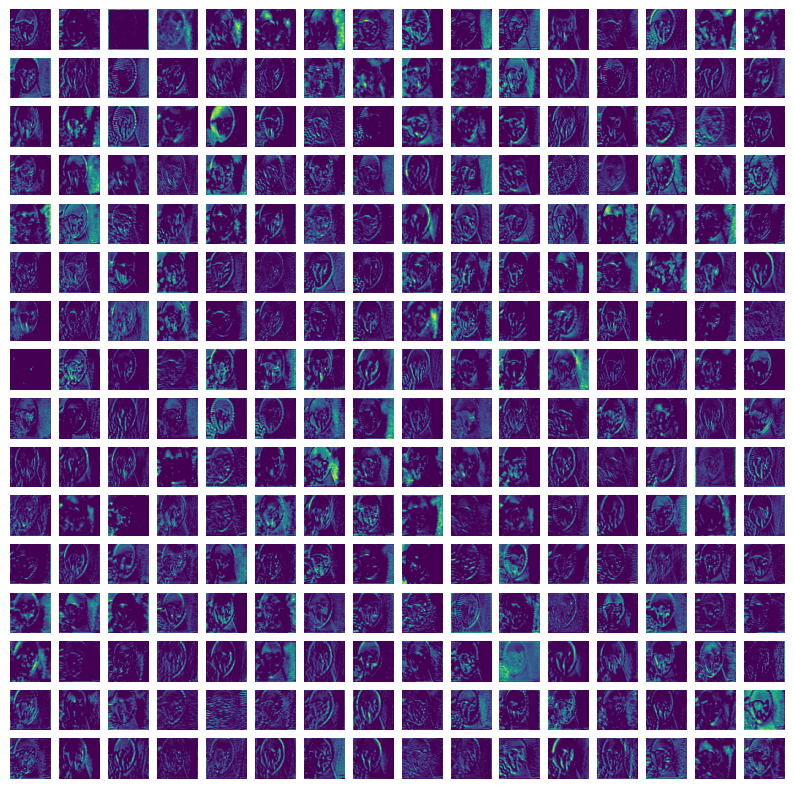

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load an example image (you need to replace 'example_image.jpg' with your image path)
image_path = '/content/cat_42.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.expand_dims(image, axis=0)  # Add batch dimension

# Load a pre-trained CNN model (you need to replace 'VGG16' with the desired model)
model = tf.keras.applications.VGG16(include_top=False, weights='imagenet')

# Get the output of a specific convolutional layer (you need to replace 'block3_conv1' with the desired layer name)
layer_name = 'block3_conv1'
conv_layer = model.get_layer(layer_name)
conv_model = Model(inputs=model.inputs, outputs=conv_layer.output)

# Perform inference on the image and get the output of the convolutional layer
features = conv_model.predict(image)


# Adjust the number of rows and columns based on the number of feature maps
num_rows = 16
num_cols = 16

plt.figure(figsize=(10, 10))
for i in range(features.shape[-1]):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(features[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()


# Plot the feature maps



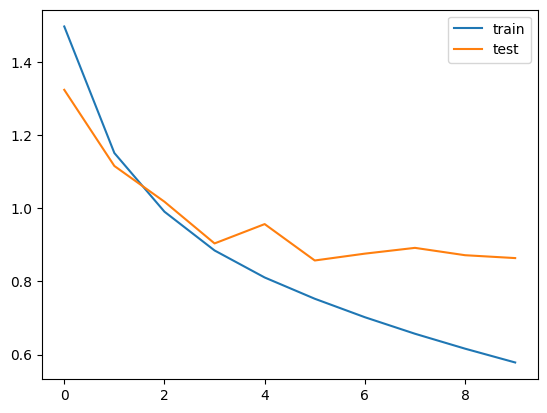

In [ ]:
# fraw plots
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()